**Exercícios de Aprendizado Supervisionado**

In [2]:
#Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_text

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,precision_score


**Download Dataset** - [Crop recommendation data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/4GBWFV)

O dataset **Crop Recommendation Data** contém um total de 1697 amostras, referente as características de solo e condições ambientais para o crescimento de diversas culturas.

Os dados estão estruturados nas seguintes colunas:
N (Nitrogênio): Quantidade de nitrogênio no solo.

*   P (Fósforo): Quantidade de fósforo no solo
*   K (Potássio): Quantidade de potássio no solo
*   temperature (Temperatura): Temperatura ambiente em graus Celsius
*   humidity (Umidade): Umidade relativa do ar em porcentagem
ph: Valor de pH do solo
*   rainfall (Precipitação): Quantidade de precipitação em mm
*   label: A cultura recomendada para plantio, com base nas condições descritas


**Importante:** em *label*, temos os rótulos (classes) que representam diferentes culturas agrícolas: Rice (Arroz), Maize (Milho), Soyabeans (Soja), Beans (Feijão), Peas (Ervilhas), Groundnuts (Amendoins), Cowpeas (Feijão-caupi), Banana, Mango (Manga), Grapes (Uvas), Watermelon (Melancia), Apple (Maçã), Orange (Laranja), Cotton (Algodão) e Coffee (Café)

**Exercício 1 – Leitura Dataset**

Realize a leitura dos dados e exiba as informações gerais do dataset

Exiba quantas amostras existem por classe (label)


In [45]:
#Digite seu código aqui
path = 'Crop_recommendation.csv'
df = pd.read_csv(path)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [38]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana
1696,80,71,47,27.505277,80.797840,6.156373,105.077699,banana


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


In [40]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [41]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


In [42]:
df['label'].unique()

array(['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'groundnuts',
       'cowpeas', 'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'cotton', 'coffee'], dtype=object)

In [43]:
df['label'].value_counts()

,count
label,
rice,139
Soyabeans,130
banana,130
beans,125
cowpeas,122
orange,122
maize,119
coffee,110
peas,100


# Nova seção

**Exercício 2 – Preparação dos Dados, divisão treinamento e testes**

Realize a divisão dos dados em treinamento e testes

In [73]:
#Preparação dos dados
from sklearn.preprocessing import LabelEncoder
df_tree = df.copy()
#Criar uma outra coluna label com os nomes
df_tree["label_names"] = df['label'].copy()

#Transformar a label original em números
le = LabelEncoder()
df_tree['label'] = le.fit_transform(df_tree['label'])

df_tree


,N,P,K,temperature,humidity,ph,rainfall,label,label_names
0,90,42,43,20.879744,82.002744,6.502985,202.935536,13,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,13,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,13,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,13,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,13,rice
...,...,...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,2,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,2,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,2,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,2,banana


In [103]:
consulta = dict(enumerate(le.classes_))
print(consulta)

{0: 'Soyabeans', 1: 'apple', 2: 'banana', 3: 'beans', 4: 'coffee', 5: 'cotton', 6: 'cowpeas', 7: 'grapes', 8: 'groundnuts', 9: 'maize', 10: 'mango', 11: 'orange', 12: 'peas', 13: 'rice', 14: 'watermelon'}


In [104]:
#Digite seu código aqui
X = df_tree.drop(['label', 'label_names'], axis=1)
y = df_tree['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
#Confirmar se as outras colunas foram deletadas
print(X)
print(y)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
1692  117  86  48    28.695620  82.541958  6.225225  116.161684
1693  114  94  53    26.335449  76.853201  6.190757  118.685826
1694  110  78  50    25.937302  78.898644  5.915569   98.217475
1695   94  70  48    25.136865  84.883944  6.195152   91.464425
1696   80  71  47    27.505277  80.797840  6.156373  105.077699

[1697 rows x 7 columns]
0       13
1       13
2       13
3       13
4       13
        ..
1692     2
1693     2
1694     2
1695     2
1696     2
Name: label, Length: 1697, dtype: int64


**Exercício 3 – Treinamento do Modelo (pode ser o K-NN ou Decision Tree)**

Escolha um algoritmo da biblioteca Scikit-learn que seja adequado para treinar um modelo de recomendação de plantio a partir das variaveis presentes no conjunto de dados.

**Utilizando Decision Tree**

In [106]:
#Digite seu código aqui
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)



**Utilizando KNN** (Apenas para ver como o modelo se sai)

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inicializando o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Avaliando o modelo
print(f"Acurácia:\n", accuracy_score(y_test, y_pred_tree))
print("Acurácia com macro:\n", precision_score(y_test, y_pred_knn, average='macro'))
print("Acurácia com weighted:\n", precision_score(y_test, y_pred_knn, average='weighted'))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))

Acurácia:
 1.0
Acurácia com macro:
 0.9958333333333333
Acurácia com weighted:
 0.9944852941176471
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        39
           3       0.94      1.00      0.97        45
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        29
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        36
          12       1.00      0.91      0.96        35
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        26

    acc

**Exercício 4 – Avaliar o Modelo**

Utilize a métrica adequada para avaliar o modelo a partir dos dados de treinamento

**Arvore de Decisão**

In [113]:
#Arvore de Decisão
print(f"Acurácia:\n", accuracy_score(y_test, y_pred_tree))
print("Acurácia com macro:\n", precision_score(y_test, y_pred, average='macro'))
print("Acurácia com weighted:\n", precision_score(y_test, y_pred, average='weighted'))

print("Relatório de Classificação:\n", classification_report(y_test, y_pred_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn))

Acurácia:
 1.0
Acurácia com macro:
 1.0
Acurácia com weighted:
 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        39
           3       0.94      1.00      0.97        45
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        29
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        36
          12       1.00      0.91      0.96        35
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        26

    accuracy                         

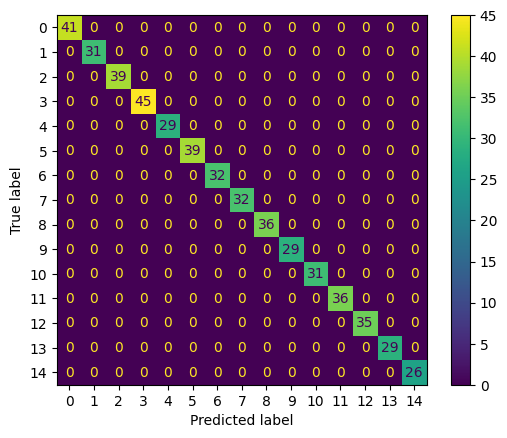

In [114]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

[Text(0.375, 0.9285714285714286, 'x[4] <= 27.685\ngini = 0.931\nsamples = 1187\nvalue = [89.0, 69.0, 91.0, 80.0, 81.0, 61.0, 90.0, 68.0, 64.0\n90.0, 69.0, 86.0, 65.0, 110.0, 74.0]'),
 Text(0.18421052631578946, 0.7857142857142857, 'x[2] <= 50.0\ngini = 0.499\nsamples = 169\nvalue = [89, 0, 0, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.27960526315789475, 0.8571428571428572, 'True  '),
 Text(0.13157894736842105, 0.6428571428571429, 'gini = 0.0\nsamples = 80\nvalue = [0, 0, 0, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.23684210526315788, 0.6428571428571429, 'gini = 0.0\nsamples = 89\nvalue = [89, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.5657894736842105, 0.7857142857142857, 'x[0] <= 50.0\ngini = 0.921\nsamples = 1018\nvalue = [0.0, 69.0, 91.0, 0.0, 81.0, 61.0, 90.0, 68.0, 64.0\n90.0, 69.0, 86.0, 65.0, 110.0, 74.0]'),
 Text(0.47039473684210525, 0.8571428571428572, '  False'),
 Text(0.34210526315789475, 0.6428571428571429, 'x[4] <= 90.001\ngini = 0.855\nsamples = 511\nv

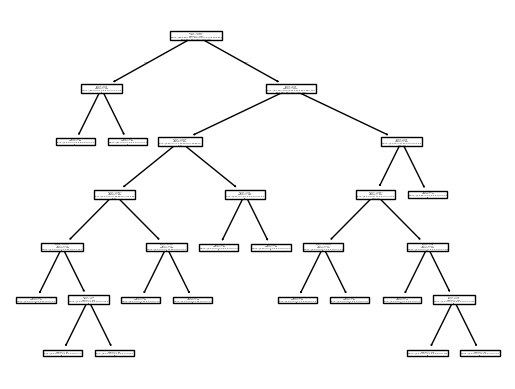

In [115]:
# Visualizar a árvore de decisão em forma de grafico
plot_tree(tree)

In [110]:
# Visualizar a árvore de decisão em forma de texto
tree_txt = export_text(tree)
print(tree_txt)

|--- feature_4 <= 27.69
|   |--- feature_2 <= 50.00
|   |   |--- class: 3
|   |--- feature_2 >  50.00
|   |   |--- class: 0
|--- feature_4 >  27.69
|   |--- feature_0 <= 50.00
|   |   |--- feature_4 <= 90.00
|   |   |   |--- feature_4 <= 74.39
|   |   |   |   |--- feature_6 <= 81.14
|   |   |   |   |   |--- class: 8
|   |   |   |   |--- feature_6 >  81.14
|   |   |   |   |   |--- feature_1 <= 47.50
|   |   |   |   |   |   |--- class: 10
|   |   |   |   |   |--- feature_1 >  47.50
|   |   |   |   |   |   |--- class: 12
|   |   |   |--- feature_4 >  74.39
|   |   |   |   |--- feature_2 <= 110.00
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_2 >  110.00
|   |   |   |   |   |--- class: 7
|   |   |--- feature_4 >  90.00
|   |   |   |--- feature_1 <= 75.00
|   |   |   |   |--- class: 11
|   |   |   |--- feature_1 >  75.00
|   |   |   |   |--- class: 1
|   |--- feature_0 >  50.00
|   |   |--- feature_1 <= 65.00
|   |   |   |--- feature_4 <= 74.92
|   |   |   |   |--- feature_